# Micrograd

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def f(x):
    return 3*x**2 - 4*x + 5

In [3]:
f(3.0)


20.0

In [5]:
xs = np.arange(-5,5,0.25)
xs

array([-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  ,
       -2.75, -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75,
       -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,
        1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,
        4.  ,  4.25,  4.5 ,  4.75])

In [6]:
ys = f(xs)
ys

array([100.    ,  91.6875,  83.75  ,  76.1875,  69.    ,  62.1875,
        55.75  ,  49.6875,  44.    ,  38.6875,  33.75  ,  29.1875,
        25.    ,  21.1875,  17.75  ,  14.6875,  12.    ,   9.6875,
         7.75  ,   6.1875,   5.    ,   4.1875,   3.75  ,   3.6875,
         4.    ,   4.6875,   5.75  ,   7.1875,   9.    ,  11.1875,
        13.75  ,  16.6875,  20.    ,  23.6875,  27.75  ,  32.1875,
        37.    ,  42.1875,  47.75  ,  53.6875])

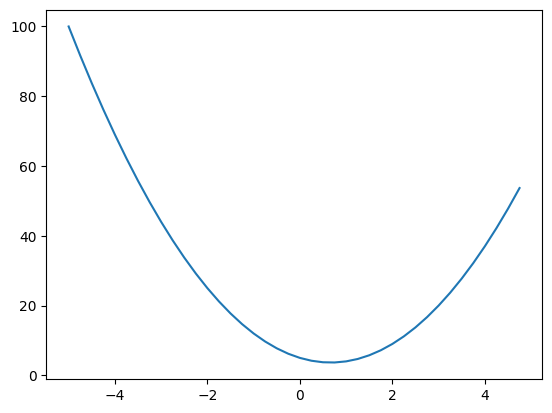

In [7]:
plt.plot(xs, ys)
plt.show()

In [8]:
h = 0.000001
x = 2/3
(f(x+h) - f(x))/h

2.999378523327323e-06

In [9]:
a  = 2.0
b = -3.0
c  = 10.0

d = a*b + c
print(f"{d=}")

d=4.0


In [10]:
h = 0.0001

a  = 2.0
b = -3.0
c  = 10.0

d1 = a*b + c
b += h
d2 = a*b + c

print(f"{d1=}\n{d2=}")

slope = (d2 - d1) / h

print(f"{slope=}")


d1=4.0
d2=4.0002
slope=2.0000000000042206


In [102]:
class Value:
    def __init__(self, data, _children=(), _op=' ', label= ' '):
        self.data = data
        self.grad = 0.0
        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op
        self.label = label
    def __repr__(self):
        return f"Value({self.data=})"
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad
        out._backward = _backward
        return out
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward
        return out
    def tanh(self):
        x = self.data
        t = (math.exp(2*x)-1)/(math.exp(2*x)+1)
        out = Value(t, (self, ), 'tanh')
        def _backward():
            self.grad += (1- t**2) * out.grad
        out._backward = _backward
        return out
    
    def backward(self):

        topo = []
        visited = set()

        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)

        self.grad = 1.0

        for node in reversed(topo):
            node._backward()

In [23]:
a = Value(2.0)
b = Value(-3.0)

In [24]:
a+b

Value(self.data=-1.0)

In [25]:

a.__add__(b)

Value(self.data=-1.0)

In [5]:
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')

In [30]:
a*b + c
# no __repr__

In [52]:
d = a*b + c
d

Value(self.data=4.0)

In [33]:
(a.__mul__(b)).__add__(c)

Value(self.data=4.0)

In [44]:
d._prev

{Value(self.data=-6.0), Value(self.data=10.0)}

In [45]:
d._op

'+'

In [6]:
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f; label = 'L'
L

Value(self.data=-8.0)

In [7]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

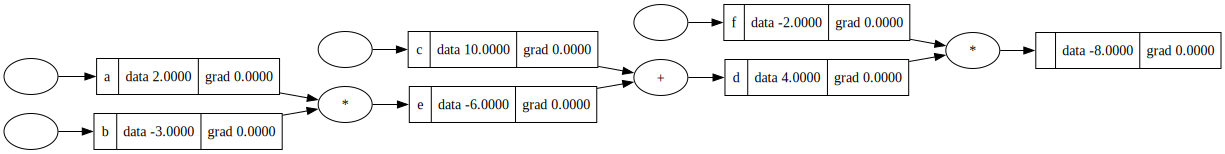

In [8]:
draw_dot(L)

In [13]:
L.grad = 1.0

In [ ]:
def lol():

    h = 0.001

    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d * f; label = 'L'
    L1  = L.data

    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    c.data += h
    e = a*b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d * f; label = 'L'
    L2  = L.data

    print((L2 - L1) / h)
    
lol()

# In lol() you can nudge any value by h and compute the slope of the loss function which you the gradient of the loss function(L) with respect to that value


-1.9999999999988916


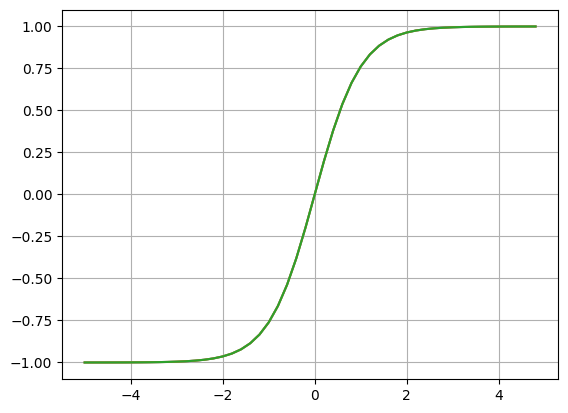

In [108]:
plt.plot(np.arange(-5,5,0.2), np.tanh(np.arange(-5,5,0.2))); plt.grid();
plt.show()

In [ ]:
# backpropagation

In [ ]:
# activation funtion is *
d.grad = f.data * L.grad
f.grad = d.data * L.grad

In [ ]:
# activation funtion is +
c.grad = d.grad
e.grad = d.grad

In [ ]:
# activation funtion is *
a.grad = e.grad * b.data
b.grad = e.grad * a.data

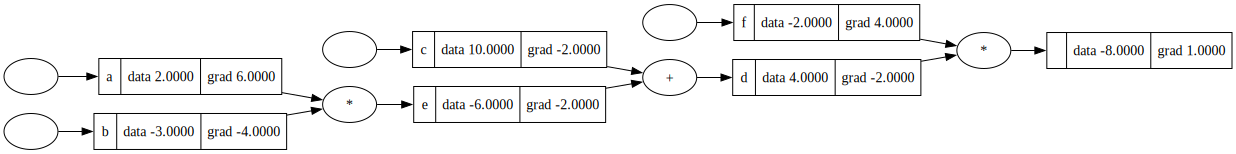

In [27]:
draw_dot(L)

In [30]:
# gradient descent
le = 0.01
a.data += le * a.grad
b.data += le * b.grad
c.data += le * c.grad
f.data += le * f.grad

# forward pass
e = a*b
d = e + c
L = d * f

L.data

-5.900192000000001

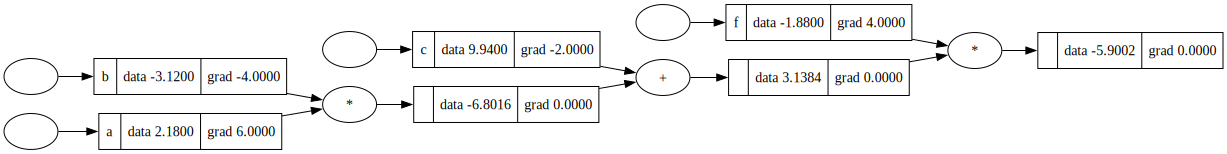

In [31]:
draw_dot(L)

In [37]:
# before backward implementation

x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
b = Value(6.8813735870195432, label='b')

x1w1 = x1*w1; x1w1.label = 'x1w1'
x2w2 = x2*w2; x2w2.label = 'x2w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1w1x2w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'

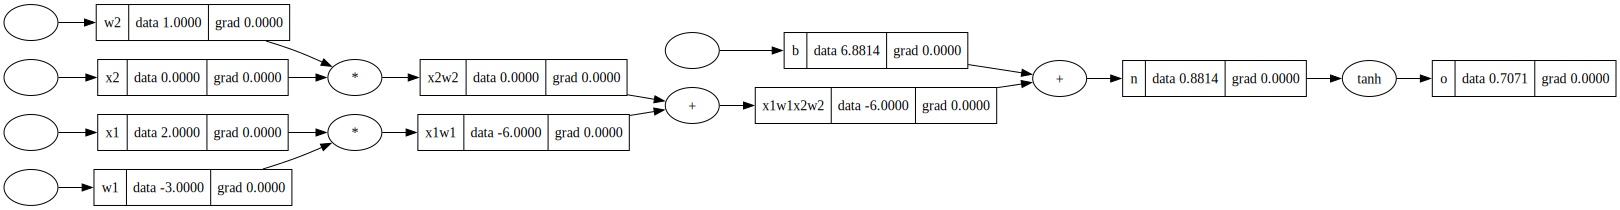

In [38]:
draw_dot(o)

In [59]:
o.grad = 1.0
n.grad = (1 - o.data**2) * o.grad

b.grad = n.grad
x1w1x2w2.grad = n.grad

x1w1.grad = x1w1x2w2.grad
x2w2.grad = x1w1x2w2.grad

x1.grad = w1.data * x1w1.grad
w1.grad = x1.data * x1w1.grad

x2.grad = w2.data * x2w2.grad
w2.grad = x2.data * x2w2.grad

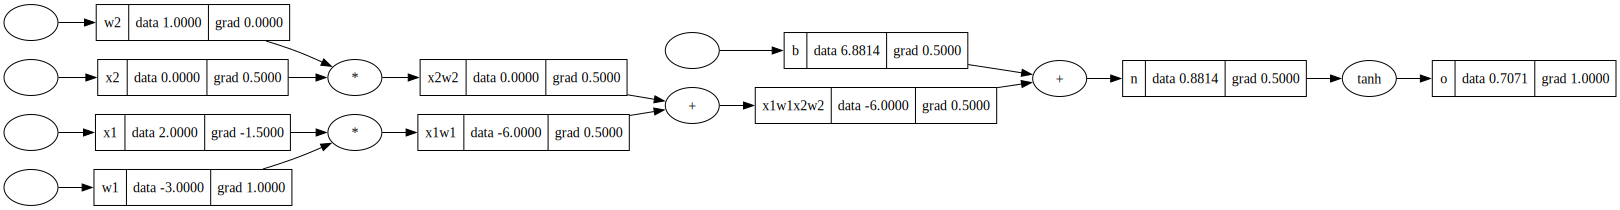

In [40]:
draw_dot(o)

In [ ]:
# after backward implementation
def init():
    x1 = Value(2.0, label='x1')
    x2 = Value(0.0, label='x2')
    w1 = Value(-3.0, label='w1')
    w2 = Value(1.0, label='w2')
    b = Value(6.8813735870195432, label='b')

    x1w1 = x1*w1; x1w1.label = 'x1w1'
    x2w2 = x2*w2; x2w2.label = 'x2w2'
    x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1w1x2w2'
    n = x1w1x2w2 + b; n.label = 'n'
    o = n.tanh(); o.label = 'o'
    # draw_dot(o)

In [94]:
init()

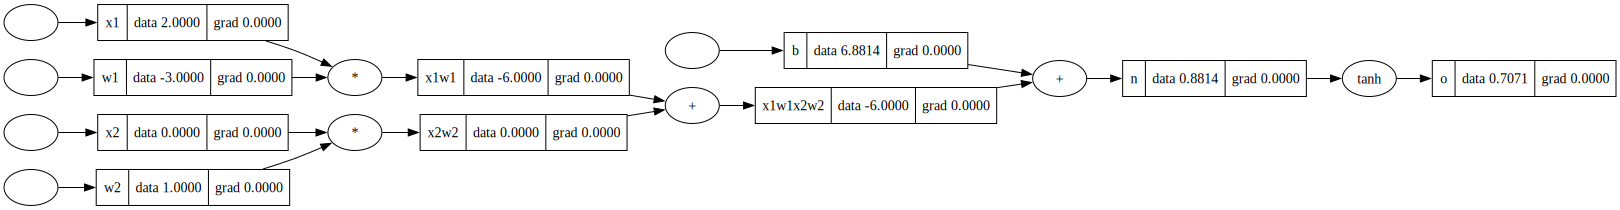

In [83]:
draw_dot(o)

In [77]:
o.grad = 1.0
o._backward()
n._backward()
b._backward()
x1w1x2w2._backward()

In [78]:
x1w1._backward()
x2w2._backward()

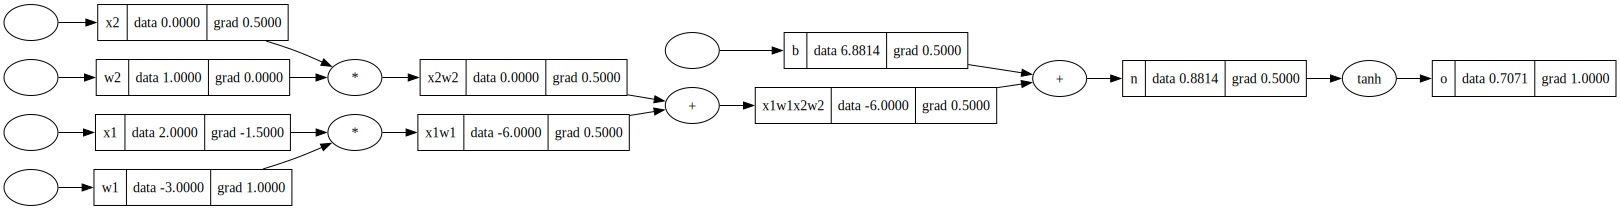

In [79]:
draw_dot(o)

In [80]:
x1.grad, x2.grad, w1.grad, w2.grad

(-1.4999999999999996, 0.4999999999999999, 0.9999999999999998, 0.0)

In [91]:
init()

In [81]:
topo = []
visited = set()

def build_topo(v):
  if v not in visited:
    visited.add(v)
    for child in v._prev:
      build_topo(child)
    topo.append(v)

build_topo(o)
topo

[Value(self.data=2.0),
 Value(self.data=-3.0),
 Value(self.data=-6.0),
 Value(self.data=1.0),
 Value(self.data=0.0),
 Value(self.data=0.0),
 Value(self.data=-6.0),
 Value(self.data=6.881373587019543),
 Value(self.data=0.8813735870195432),
 Value(self.data=0.7071067811865476)]

In [85]:
o.grad = 1.0

topo = []
visited = set()
def build_topo(v):
  if v not in visited:
    visited.add(v)
    for child in v._prev:
      build_topo(child)
    topo.append(v)
build_topo(o)

for node in reversed(topo):
    node._backward()

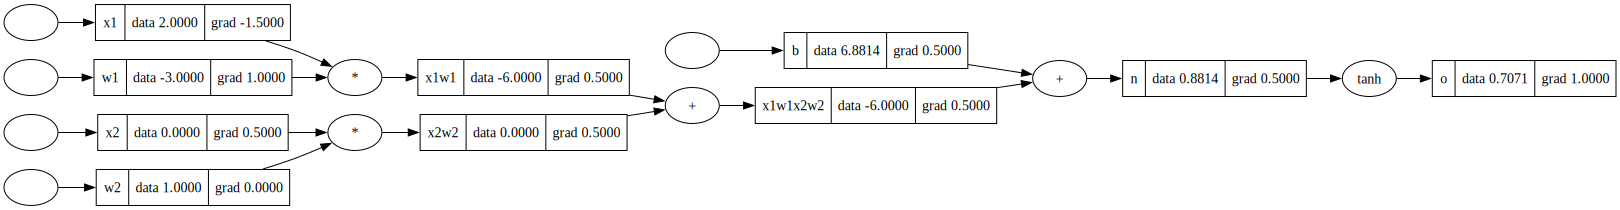

In [86]:
draw_dot(o)

In [95]:
init()

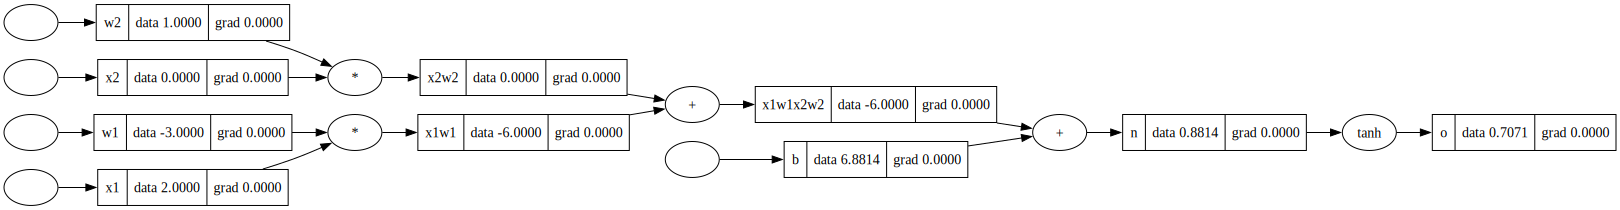

In [96]:
draw_dot(o)

In [97]:
o.backward()

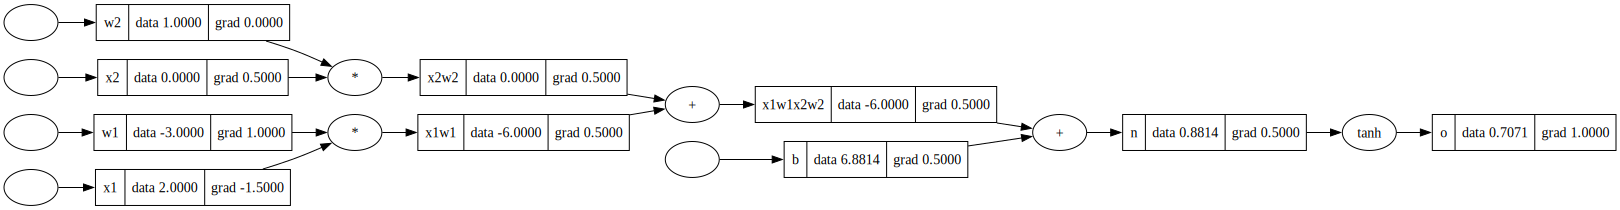

In [98]:
draw_dot(o)

In [104]:
a  = Value(2.0, label='a')
b = a + a; b.label = 'b'

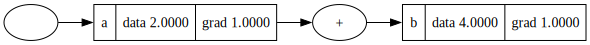

In [101]:
# before correction
b.backward()
draw_dot(b)


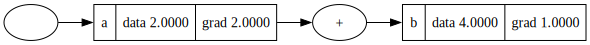

In [105]:
# after correction
b.backward()
draw_dot(b)

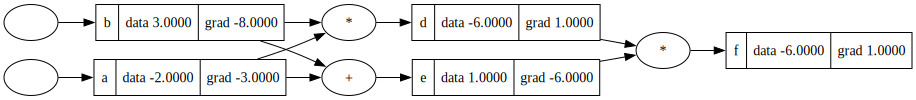

In [109]:
a = Value(-2.0, label='a')
b = Value(3.0, label='b')
d = a * b    ; d.label = 'd'
e = a + b    ; e.label = 'e'
f = d * e    ; f.label = 'f'

f.backward()

draw_dot(f)